# Drama Reviews Exploratory Data Analysis

Here, I use matplotlib, seaborn and wordcloud to do a preliminary analysis of the drama ratings and reviews. Namely, I wanted to find out:

1. Overall rating distribution
2. Story, cast, music & rewatch value rating distribution by sentiment
3. Word, uppercase character & special character count of reviews by sentiment
4. Frequently appearing words in reviews by sentiment

This notebook is the third of a 5 part series of my drama reviews project.

## 1. Import libraries and load CSV file

In [1]:
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drama_reviews_processed.csv')

In [3]:
df.head()

,drama_title,user_name,overall_rating,story_rating,cast_rating,music_rating,rewatch_value_rating,reviews,sentiment,reviews_processed,language,reviews_processed2x,reviews_lemmatized
0,Dear My Friends (2016),iamgeralddd,10.0,10.0,10.0,10.0,10.0,Thank you writer Noh for making this heart-wa...,1,thank you writer noh for making this heart war...,en,thank writer noh making heart warming story co...,heart warming story live drama excited weekend...
1,Dear My Friends (2016),Dounie,10.0,10.0,10.0,8.5,9.0,"I know for some, stories following and tellin...",1,i know for some stories following and telling ...,en,know stories following telling lives older peo...,story old people promise boring decide try fun...
2,Dear My Friends (2016),Pelin,10.0,10.0,10.0,10.0,10.0,"Story ""A realistic, cheerful story about “twi...",1,story a realistic cheerful story about twiligh...,en,story realistic cheerful story twilight youths...,story realistic cheerful story twilight young ...
3,Dear My Friends (2016),silent_whispers,9.0,9.0,10.0,10.0,7.0,When I heard about a drama that would be comi...,1,when i heard about a drama that would be comin...,en,heard drama would coming 2016 twilight youths ...,drama twilight youth life long friend drama lo...
4,Dear My Friends (2016),Dana,9.0,9.0,10.0,7.0,3.0,In a sometimes overwhelming world of perfect ...,1,in a sometimes overwhelming world of perfect f...,en,sometimes overwhelming world perfect faces scr...,overwhelming world perfect script dear friend ...


## 2. Get the word, uppercase character and special character count of the reviews

This information is added to the DataFrame but analysed later. 

In [4]:
df['word_count'] = [len(review.split()) for review in df['reviews']]
df['uppercase_char_count'] = [sum(char.isupper() for char in review) for review in df['reviews']]
df['special_char_count'] = [sum(char in string.punctuation for char in review) for review in df['reviews']]

## 2.2 Split the DataFrame into Negative, Neutral and Positive based on overall sentiment

Where overall sentiment 
1. Less than 5 == Negative
2. Equals to 5 == Neutral
3. More than 5 == Positive

This aids in analysing the ratings by sentiment.

In [63]:
df['sentiment'].value_counts()

 1    23145
-1     1167
 0      722
Name: sentiment, dtype: int64

Over 92% of the sentiments are positive; about 4.5% of the ratings are negative; the rest are neutral.

In [5]:
df_positive = df[df['sentiment'] == 1]
df_negative = df[df['sentiment'] == -1]
df_neutral = df[df['sentiment'] == 0]

## 3. Find out the Overall Rating Distribution

In [64]:
df['overall_rating'].value_counts()

10.0    5791
8.0     4118
9.0     3629
7.0     1899
7.5     1824
9.5     1795
8.5     1435
6.5     1367
6.0     1041
5.0      722
4.0      359
5.5      246
3.0      244
1.0      167
4.5      149
2.0      108
3.5       75
2.5       45
1.5       20
Name: overall_rating, dtype: int64

Text(0.5, 1.0, 'Overall rating distribution')

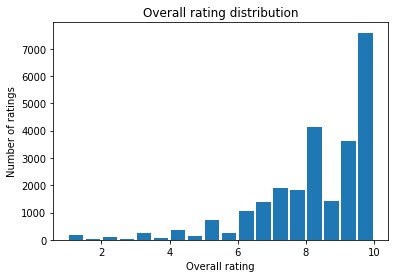

In [24]:
plt.hist(df['overall_rating'],bins=18,rwidth=0.85)
plt.xlabel('Overall rating')
plt.ylabel('Number of ratings')
plt.title('Overall rating distribution')

We can see that most dramas have a positive rating, with 10.0/10.0 as the most frequently given rating, followed by 8.0/10.0. The lowest rating given is 1.5/10.0.

## 4. Create function to plot boxplot and plot the rating distribution by sentiment

A boxplot function is created so that the data, color and position of boxplot can be modified. This removed the need to define the parameters each time a new data is given.

__Color & its corresponding sentiment__

- Red - Negative
- Orange - Neutral
- Green - Positive

<br>

__Ratings plotted__

- Story rating
- Cast rating
- Music rating
- Rewatch value rating

In [ ]:
def boxplot(data,c,p): # create function to draw boxplots, modifying data, color and position
    return plt.boxplot(data, positions=[p], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))

### Story Rating Distribution

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

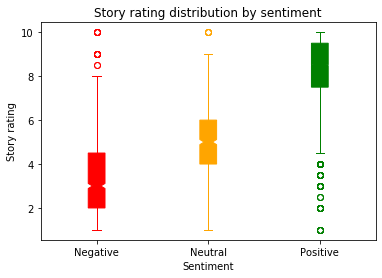

In [59]:
fig, ax = plt.subplots()
boxplot(df_negative['story_rating'],'red',-1) # call function to draw boxplot for each sentiment
boxplot(df_neutral['story_rating'],'orange',0)
boxplot(df_positive['story_rating'],'green',1)

plt.title('Story rating distribution by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Story rating')
labels=['Negative','Neutral','Positive']
ax.set_xticklabels(labels)

The story rating seems to be highly correlated with the overall drama rating, with the 25th-75th percentile story ratings hovering around their respective overall drama rating.

It is noteworthy that for all sentiment categories, there are viewers with an extreme view of the story, giving a 1.0 or a 10.0 regardless of their sentiments.

### Cast Rating Distribution

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

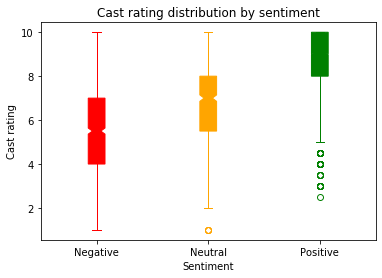

In [60]:
fig, ax = plt.subplots()
boxplot(df_negative['cast_rating'],'red',-1) # call function to draw boxplot for each sentiment
boxplot(df_neutral['cast_rating'],'orange',0)
boxplot(df_positive['cast_rating'],'green',1)

plt.title('Cast rating distribution by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Cast rating')
labels=['Negative','Neutral','Positive']
ax.set_xticklabels(labels)

This graph is rating surprising! A substantial proportion of viewers who gave a negative overall rating and the majority of viewers who gave a neutral overall rating, think that the cast selection/acting was good. Meanwhile, the cast rating for viewers with positive sentiments are saturated between 8.0-10.0. Evidently, the cast rating is not a good indicator of how highly the viewer would rate the drama overall.

### Music Rating Distribution

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

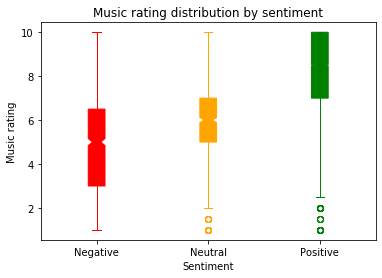

In [61]:
fig, ax = plt.subplots()
boxplot(df_negative['music_rating'],'red',-1) # call function to draw boxplot for each sentiment
boxplot(df_neutral['music_rating'],'orange',0)
boxplot(df_positive['music_rating'],'green',1)

plt.title('Music rating distribution by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Music rating')
labels=['Negative','Neutral','Positive']
ax.set_xticklabels(labels)

Again, viewers who gave a negative overall rating found that the music was tolerable.

### Rewatch Value Rating Distribution

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

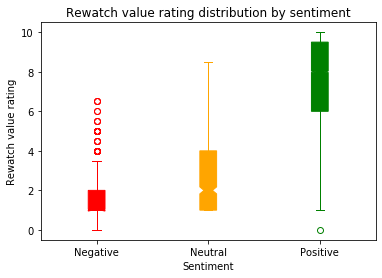

In [62]:
fig, ax = plt.subplots()
boxplot(df_negative['rewatch_value_rating'],'red',-1) # call function to draw boxplot for each sentiment
boxplot(df_neutral['rewatch_value_rating'],'orange',0)
boxplot(df_positive['rewatch_value_rating'],'green',1)

plt.title('Rewatch value rating distribution by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rewatch value rating')
labels=['Negative','Neutral','Positive']
ax.set_xticklabels(labels)

Not surprising, viewers with a negative sentiment gave a very low rewatch value rating. Majority of the viewers with a neutral sentiment gave a negative rewatch value rating as well. 

## 5. Plot the distributions of word, uppercase character and special character count

The DataFrame's 'reviews' column was used to find out the number of words, uppercase characters and special characters. The text did not undergo pre-processing.

I used a probability density estimation to estimate the likelihoods of outcomes on these continuous variables. As these variables do not follow a common probability distribution (e.g. having more than one peaks), the Kernel Density Estimation is used. In other words, a non-parametric probability estimation is used to find out the probability distribution of data without a pre-defined distribution. Each observation becomes a "parameter" controlling the outcome.

### Word Count

Text(0.5, 0, 'Number of words')

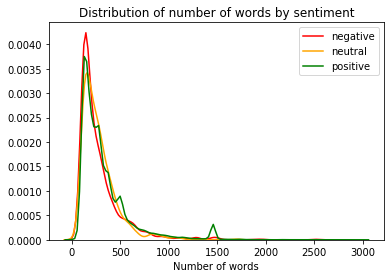

In [73]:
ax = sns.kdeplot(df_negative['word_count'],color='red',label='negative')
ax = sns.kdeplot(df_neutral['word_count'],color='orange',label='neutral')
ax = sns.kdeplot(df_positive['word_count'],color='green',label='positive')
ax.set_title('Distribution of no. of words by sentiment')
ax.set_xlabel('No. of words')

Surprisingly, negative sentiment viewers wrote similar length reviews as compared to neutral and positive sentiment viewers. I have read positive reviews before. Some were essays, detailing their thoughts on the overall drama, story, cast, music and rewatch value. I did not expect negative sentiment viewers gave such thorough explanation of their thoughts on the dramas.

### Uppercase Character Count

Text(0.5, 0, 'No. of uppercase characters')

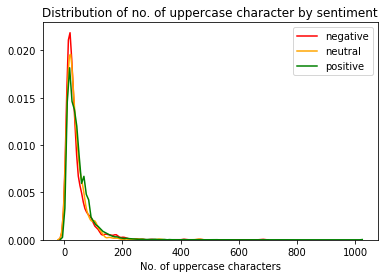

In [75]:
ax = sns.kdeplot(df_negative['uppercase_char_count'],color='red',label='negative')
ax = sns.kdeplot(df_neutral['uppercase_char_count'],color='orange',label='neutral')
ax = sns.kdeplot(df_positive['uppercase_char_count'],color='green',label='positive')
ax.set_title('Distribution of no. of uppercase character by sentiment')
ax.set_xlabel('No. of uppercase characters')

A higher proportion of negative sentiment viewers used uppercase characters as compared to neutral and positive sentiment viewers.

### Special Character Count

Special characters refer to punctuations. This is significant in reviews as viewers display their emotions with the multiple use of "!", "?", or other punctuations.

Text(0.5, 0, 'No. of special characters')

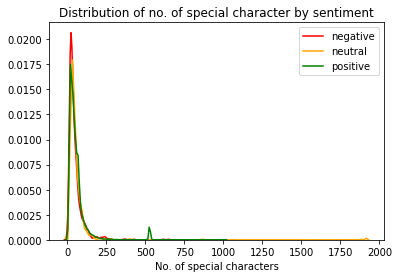

In [76]:
ax = sns.kdeplot(df_negative['special_char_count'],color='red',label='negative')
ax = sns.kdeplot(df_neutral['special_char_count'],color='orange',label='neutral')
ax = sns.kdeplot(df_positive['special_char_count'],color='green',label='positive')
ax.set_title('Distribution of no. of special character by sentiment')
ax.set_xlabel('No. of special characters')

All three sentiments have rather similar special character count.

## 6. Generate word clouds to find the most commonly used words

A function is used to create the word cloud of the top 100 most commonly occurring words. The function is then called for each sentiment category.

The DataFrame's 'reviews_processed2x' column is used as the text has been preprocessed with no stopwords as well.

In [47]:
def create_word_cloud(string): # create function that draws the wordcloud
    cloud = WordCloud(width=720, height= 540, background_color = "white", max_words = 100)
    cloud.generate(string)
    plt.figure(figsize=(10, 7.5))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()

### Negative Sentiment

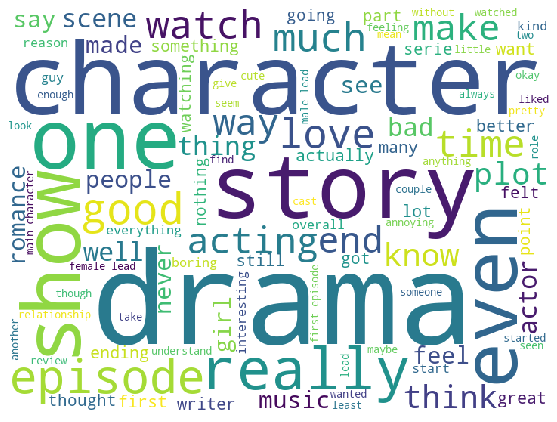

In [49]:
str_bad_reviews = df_negative['reviews_processed2x'].str.cat() # add the reviews by all users into a big string
create_word_cloud(str_bad_reviews) # call the word cloud function

Few negative words, such as "bad" and "annoying" were used. In fact, positive words like "good" and "interesting" were used sometimes.

### Neutral Sentiment

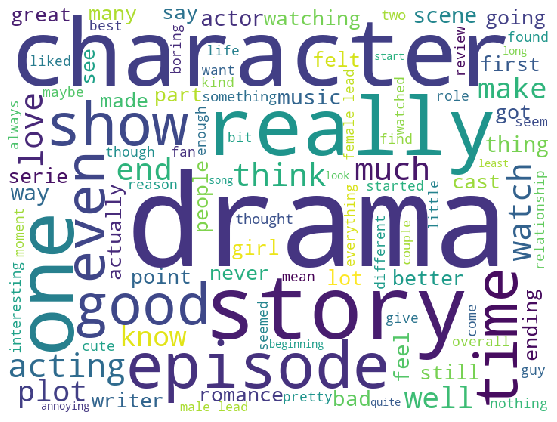

In [52]:
str_neut_reviews = df_neutral['reviews_processed2x'].str.cat() # add the reviews by all users into a big string
create_word_cloud(str_neut_reviews)  # call the word cloud function

There is a mixture of negative (e.g. "annoying", "bad", "boring") and positive words (e.g. "cute", "love") were used. Interestingly, the most used words for viewers with negative and neutral sentiment were "character", "drama" and "story". Further analysis of statements with these words could reveal insight on the story and cast rating these viewers have given.

### Positive Sentiment

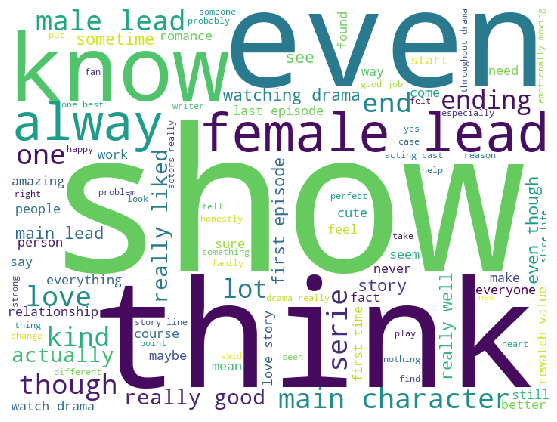

In [54]:
str_good_reviews = df_positive['reviews_processed2x'].str.cat() # add the reviews by all users into a big string
create_word_cloud(str_good_reviews)  # call the word cloud function

Surprisingly, "character", "drama" and "story" were not used as often in positive sentiment viewers. More positive words, such as "amazing", "strong" and "love" were used.